# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [10]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

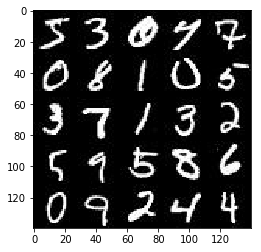

In [11]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

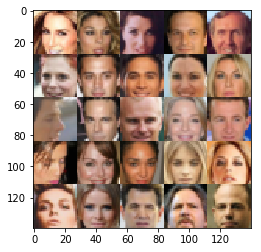

In [12]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/Users/johannesgrabisch/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [14]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name='learn_rate')
    return inputs_real, inputs_z, learn_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [15]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        # x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 16x16x256 now
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        #logits = tf.slice(logits, [0, 2, 2, 0], [-1, 28, 28, -1])
        out = tf.tanh(logits)
        
        return out

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
    
    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.1167... Generator Loss: 8.4802
Epoch 0/2... Discriminator Loss: 0.0167... Generator Loss: 6.0508
Epoch 0/2... Discriminator Loss: 0.0201... Generator Loss: 4.7597
Epoch 0/2... Discriminator Loss: 0.0856... Generator Loss: 2.8105


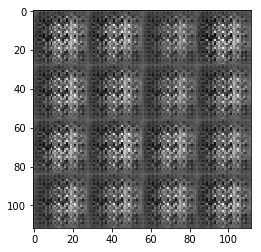

Epoch 0/2... Discriminator Loss: 1.1592... Generator Loss: 11.2587
Epoch 0/2... Discriminator Loss: 1.8864... Generator Loss: 0.4267
Epoch 0/2... Discriminator Loss: 2.7357... Generator Loss: 0.1742
Epoch 0/2... Discriminator Loss: 0.3466... Generator Loss: 2.1752
Epoch 0/2... Discriminator Loss: 0.3768... Generator Loss: 6.6399


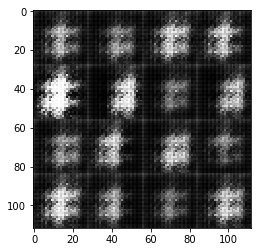

Epoch 0/2... Discriminator Loss: 0.3247... Generator Loss: 3.1802
Epoch 0/2... Discriminator Loss: 0.1948... Generator Loss: 2.4761
Epoch 0/2... Discriminator Loss: 0.2801... Generator Loss: 3.7464
Epoch 0/2... Discriminator Loss: 0.1426... Generator Loss: 3.9180
Epoch 0/2... Discriminator Loss: 0.2672... Generator Loss: 2.3348


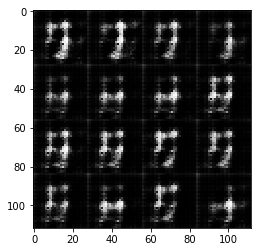

Epoch 0/2... Discriminator Loss: 0.2169... Generator Loss: 2.1971
Epoch 0/2... Discriminator Loss: 1.0574... Generator Loss: 0.5905
Epoch 0/2... Discriminator Loss: 0.5545... Generator Loss: 3.7540
Epoch 0/2... Discriminator Loss: 0.3732... Generator Loss: 2.6676
Epoch 0/2... Discriminator Loss: 0.2855... Generator Loss: 2.7767


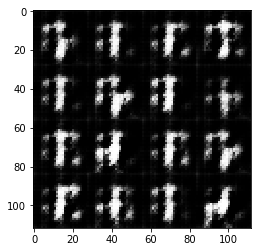

Epoch 0/2... Discriminator Loss: 0.2693... Generator Loss: 2.1011
Epoch 0/2... Discriminator Loss: 0.4239... Generator Loss: 3.5923
Epoch 0/2... Discriminator Loss: 0.3763... Generator Loss: 2.3831
Epoch 0/2... Discriminator Loss: 0.3576... Generator Loss: 2.1772
Epoch 0/2... Discriminator Loss: 0.3413... Generator Loss: 3.5318


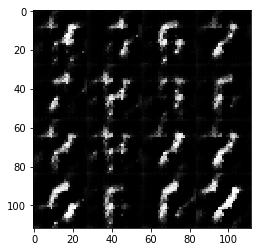

Epoch 0/2... Discriminator Loss: 0.1936... Generator Loss: 3.7088
Epoch 0/2... Discriminator Loss: 0.2382... Generator Loss: 2.3900
Epoch 0/2... Discriminator Loss: 0.1681... Generator Loss: 3.0855
Epoch 0/2... Discriminator Loss: 0.0772... Generator Loss: 4.7640
Epoch 0/2... Discriminator Loss: 0.2312... Generator Loss: 3.2545


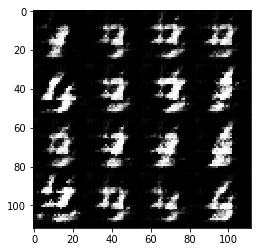

Epoch 0/2... Discriminator Loss: 0.4843... Generator Loss: 3.8900
Epoch 0/2... Discriminator Loss: 0.3498... Generator Loss: 2.4729
Epoch 0/2... Discriminator Loss: 1.6345... Generator Loss: 8.3884
Epoch 0/2... Discriminator Loss: 0.2964... Generator Loss: 3.0110
Epoch 0/2... Discriminator Loss: 0.5410... Generator Loss: 3.5113


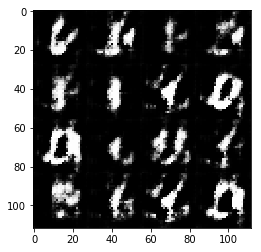

Epoch 0/2... Discriminator Loss: 0.4021... Generator Loss: 2.0153
Epoch 0/2... Discriminator Loss: 0.3733... Generator Loss: 2.4329
Epoch 0/2... Discriminator Loss: 0.5102... Generator Loss: 1.3646
Epoch 0/2... Discriminator Loss: 0.3230... Generator Loss: 1.9824
Epoch 0/2... Discriminator Loss: 1.1102... Generator Loss: 0.9951


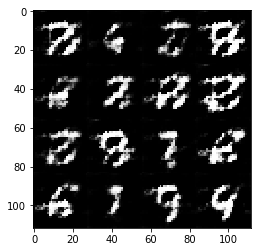

Epoch 0/2... Discriminator Loss: 0.5259... Generator Loss: 2.0038
Epoch 0/2... Discriminator Loss: 0.7405... Generator Loss: 1.4598
Epoch 0/2... Discriminator Loss: 0.2753... Generator Loss: 3.4188
Epoch 0/2... Discriminator Loss: 0.2680... Generator Loss: 2.5161
Epoch 0/2... Discriminator Loss: 0.4031... Generator Loss: 2.0890


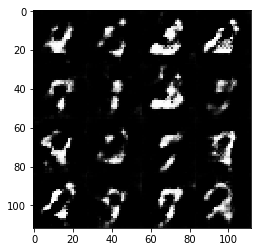

Epoch 0/2... Discriminator Loss: 0.4364... Generator Loss: 2.1055
Epoch 0/2... Discriminator Loss: 0.5450... Generator Loss: 2.0880
Epoch 0/2... Discriminator Loss: 0.7931... Generator Loss: 3.1319
Epoch 0/2... Discriminator Loss: 0.2966... Generator Loss: 2.3149
Epoch 0/2... Discriminator Loss: 0.3221... Generator Loss: 2.2918


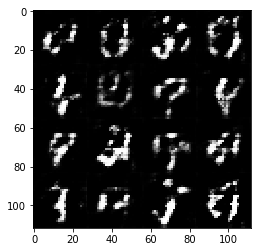

Epoch 0/2... Discriminator Loss: 0.7530... Generator Loss: 1.3853
Epoch 0/2... Discriminator Loss: 1.0670... Generator Loss: 3.7033
Epoch 0/2... Discriminator Loss: 0.4777... Generator Loss: 1.7059
Epoch 0/2... Discriminator Loss: 0.7653... Generator Loss: 1.7068
Epoch 0/2... Discriminator Loss: 0.4026... Generator Loss: 2.4675


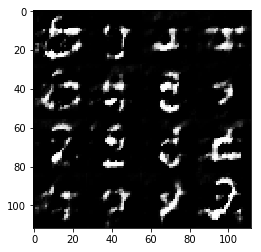

Epoch 0/2... Discriminator Loss: 0.3037... Generator Loss: 2.4010
Epoch 0/2... Discriminator Loss: 0.9329... Generator Loss: 1.5854
Epoch 0/2... Discriminator Loss: 0.6265... Generator Loss: 1.4327
Epoch 0/2... Discriminator Loss: 0.9229... Generator Loss: 1.0112
Epoch 0/2... Discriminator Loss: 0.7570... Generator Loss: 1.1301


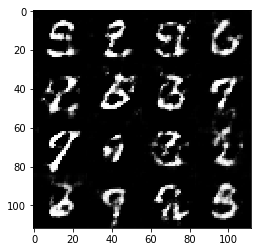

Epoch 0/2... Discriminator Loss: 0.5744... Generator Loss: 1.6629
Epoch 0/2... Discriminator Loss: 0.5329... Generator Loss: 1.6648
Epoch 0/2... Discriminator Loss: 0.9719... Generator Loss: 1.0539
Epoch 0/2... Discriminator Loss: 0.7940... Generator Loss: 1.0837
Epoch 0/2... Discriminator Loss: 0.4897... Generator Loss: 2.1559


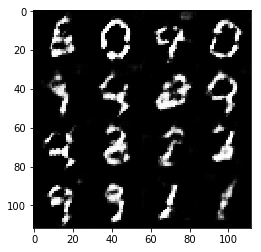

Epoch 0/2... Discriminator Loss: 0.9577... Generator Loss: 0.8851
Epoch 0/2... Discriminator Loss: 0.9190... Generator Loss: 1.1767
Epoch 0/2... Discriminator Loss: 0.6330... Generator Loss: 2.0750
Epoch 0/2... Discriminator Loss: 0.7025... Generator Loss: 1.5388
Epoch 0/2... Discriminator Loss: 0.9337... Generator Loss: 0.7403


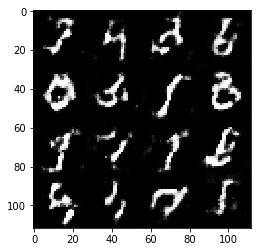

Epoch 0/2... Discriminator Loss: 0.9929... Generator Loss: 0.8852
Epoch 0/2... Discriminator Loss: 0.8421... Generator Loss: 1.3945
Epoch 0/2... Discriminator Loss: 0.7593... Generator Loss: 1.2339
Epoch 0/2... Discriminator Loss: 0.6269... Generator Loss: 2.1074
Epoch 0/2... Discriminator Loss: 0.6740... Generator Loss: 1.7110


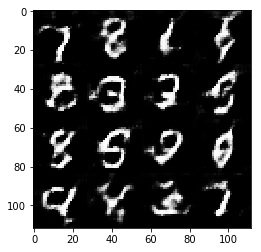

Epoch 0/2... Discriminator Loss: 1.2811... Generator Loss: 2.7838
Epoch 0/2... Discriminator Loss: 0.6184... Generator Loss: 1.2422
Epoch 0/2... Discriminator Loss: 0.5580... Generator Loss: 2.1978
Epoch 0/2... Discriminator Loss: 0.9850... Generator Loss: 1.7823
Epoch 0/2... Discriminator Loss: 0.8224... Generator Loss: 1.0903


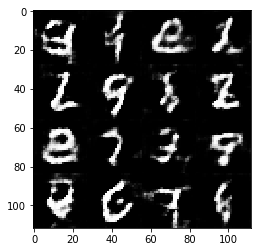

Epoch 0/2... Discriminator Loss: 0.7695... Generator Loss: 1.0996
Epoch 0/2... Discriminator Loss: 0.6626... Generator Loss: 1.8300
Epoch 0/2... Discriminator Loss: 0.8202... Generator Loss: 1.5610
Epoch 0/2... Discriminator Loss: 0.8595... Generator Loss: 1.8518
Epoch 0/2... Discriminator Loss: 0.7357... Generator Loss: 2.4378


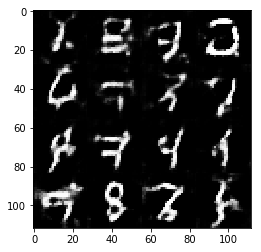

Epoch 0/2... Discriminator Loss: 0.9112... Generator Loss: 0.9075
Epoch 0/2... Discriminator Loss: 1.5748... Generator Loss: 0.6725
Epoch 0/2... Discriminator Loss: 1.1233... Generator Loss: 1.4919
Epoch 0/2... Discriminator Loss: 0.8020... Generator Loss: 1.4481
Epoch 0/2... Discriminator Loss: 1.0582... Generator Loss: 1.9842


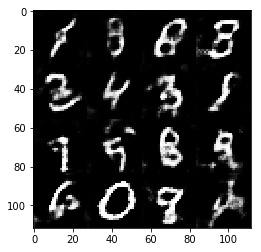

Epoch 0/2... Discriminator Loss: 0.8465... Generator Loss: 1.1671
Epoch 0/2... Discriminator Loss: 0.6689... Generator Loss: 1.3794
Epoch 0/2... Discriminator Loss: 0.8137... Generator Loss: 1.0179
Epoch 0/2... Discriminator Loss: 0.9295... Generator Loss: 2.4919
Epoch 1/2... Discriminator Loss: 0.5982... Generator Loss: 1.9640


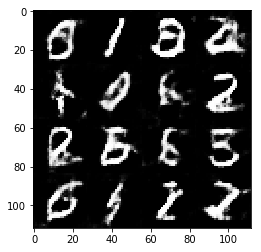

Epoch 1/2... Discriminator Loss: 0.6186... Generator Loss: 1.4947
Epoch 1/2... Discriminator Loss: 0.7119... Generator Loss: 1.2219
Epoch 1/2... Discriminator Loss: 1.1173... Generator Loss: 0.7487
Epoch 1/2... Discriminator Loss: 0.9628... Generator Loss: 0.7814
Epoch 1/2... Discriminator Loss: 0.9952... Generator Loss: 0.7911


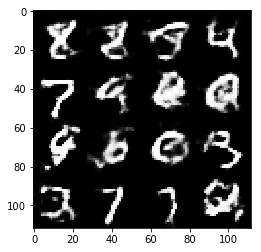

Epoch 1/2... Discriminator Loss: 0.9189... Generator Loss: 0.8868
Epoch 1/2... Discriminator Loss: 0.7246... Generator Loss: 1.4289
Epoch 1/2... Discriminator Loss: 0.6289... Generator Loss: 1.5040
Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 1.1196
Epoch 1/2... Discriminator Loss: 0.7767... Generator Loss: 1.3312


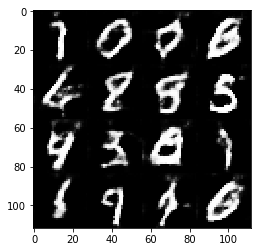

Epoch 1/2... Discriminator Loss: 0.7717... Generator Loss: 2.4683
Epoch 1/2... Discriminator Loss: 1.0070... Generator Loss: 0.8063
Epoch 1/2... Discriminator Loss: 0.7274... Generator Loss: 1.1481
Epoch 1/2... Discriminator Loss: 1.5376... Generator Loss: 0.3933
Epoch 1/2... Discriminator Loss: 0.7687... Generator Loss: 1.3209


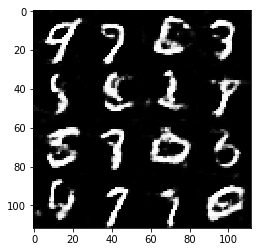

Epoch 1/2... Discriminator Loss: 0.8824... Generator Loss: 1.1386
Epoch 1/2... Discriminator Loss: 0.8181... Generator Loss: 2.1802
Epoch 1/2... Discriminator Loss: 0.9169... Generator Loss: 1.9644
Epoch 1/2... Discriminator Loss: 0.7388... Generator Loss: 1.6729
Epoch 1/2... Discriminator Loss: 1.2651... Generator Loss: 3.0982


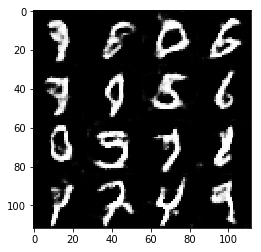

Epoch 1/2... Discriminator Loss: 0.9682... Generator Loss: 0.7138
Epoch 1/2... Discriminator Loss: 0.8489... Generator Loss: 0.9224
Epoch 1/2... Discriminator Loss: 0.8551... Generator Loss: 1.7111
Epoch 1/2... Discriminator Loss: 0.8330... Generator Loss: 1.0195
Epoch 1/2... Discriminator Loss: 0.7217... Generator Loss: 1.1911


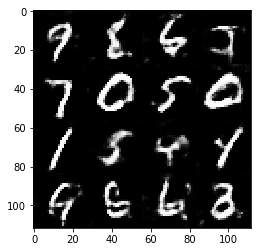

Epoch 1/2... Discriminator Loss: 0.6152... Generator Loss: 1.7946
Epoch 1/2... Discriminator Loss: 1.2017... Generator Loss: 0.5385
Epoch 1/2... Discriminator Loss: 0.9082... Generator Loss: 1.7659
Epoch 1/2... Discriminator Loss: 0.6287... Generator Loss: 1.6402
Epoch 1/2... Discriminator Loss: 0.9449... Generator Loss: 0.8329


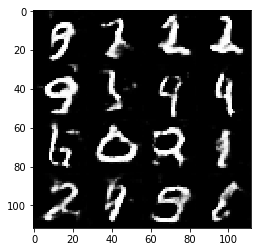

Epoch 1/2... Discriminator Loss: 0.7347... Generator Loss: 1.2428
Epoch 1/2... Discriminator Loss: 0.7004... Generator Loss: 1.4239
Epoch 1/2... Discriminator Loss: 0.7426... Generator Loss: 0.9831
Epoch 1/2... Discriminator Loss: 0.7015... Generator Loss: 1.0243
Epoch 1/2... Discriminator Loss: 0.8357... Generator Loss: 1.7622


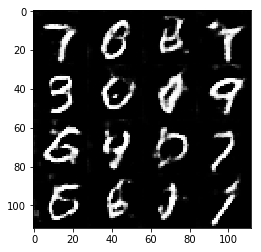

Epoch 1/2... Discriminator Loss: 0.8848... Generator Loss: 2.6375
Epoch 1/2... Discriminator Loss: 0.8423... Generator Loss: 0.8365
Epoch 1/2... Discriminator Loss: 0.9238... Generator Loss: 1.4936
Epoch 1/2... Discriminator Loss: 0.7755... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 0.9023... Generator Loss: 0.7878


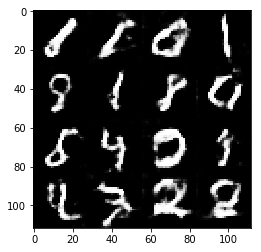

Epoch 1/2... Discriminator Loss: 0.9015... Generator Loss: 0.7860
Epoch 1/2... Discriminator Loss: 1.0250... Generator Loss: 0.6845
Epoch 1/2... Discriminator Loss: 0.6063... Generator Loss: 1.1838
Epoch 1/2... Discriminator Loss: 1.7556... Generator Loss: 0.2453
Epoch 1/2... Discriminator Loss: 0.7484... Generator Loss: 1.2832


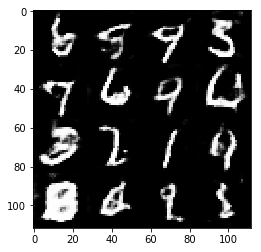

Epoch 1/2... Discriminator Loss: 0.7986... Generator Loss: 1.0792
Epoch 1/2... Discriminator Loss: 0.5794... Generator Loss: 1.2351
Epoch 1/2... Discriminator Loss: 0.6256... Generator Loss: 1.4315
Epoch 1/2... Discriminator Loss: 2.2523... Generator Loss: 0.1777
Epoch 1/2... Discriminator Loss: 0.3759... Generator Loss: 2.0788


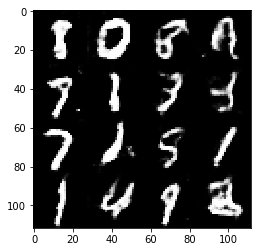

Epoch 1/2... Discriminator Loss: 0.6889... Generator Loss: 1.4386
Epoch 1/2... Discriminator Loss: 0.7462... Generator Loss: 0.9590
Epoch 1/2... Discriminator Loss: 0.6442... Generator Loss: 1.3882
Epoch 1/2... Discriminator Loss: 0.5320... Generator Loss: 1.3792
Epoch 1/2... Discriminator Loss: 0.6531... Generator Loss: 0.9347


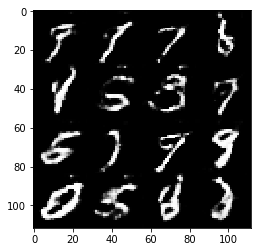

Epoch 1/2... Discriminator Loss: 1.4419... Generator Loss: 4.3573
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.1518
Epoch 1/2... Discriminator Loss: 0.6258... Generator Loss: 1.2015
Epoch 1/2... Discriminator Loss: 0.4944... Generator Loss: 1.3388
Epoch 1/2... Discriminator Loss: 1.3911... Generator Loss: 0.3853


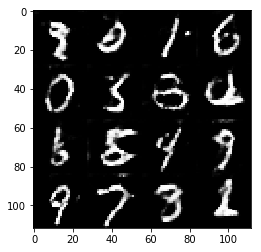

Epoch 1/2... Discriminator Loss: 0.6933... Generator Loss: 1.0608
Epoch 1/2... Discriminator Loss: 0.6242... Generator Loss: 1.3028
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 0.5118
Epoch 1/2... Discriminator Loss: 1.6783... Generator Loss: 0.3572
Epoch 1/2... Discriminator Loss: 0.7443... Generator Loss: 1.0361


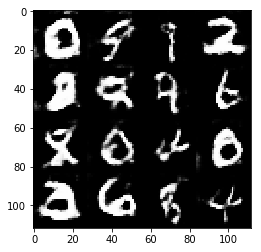

Epoch 1/2... Discriminator Loss: 0.7197... Generator Loss: 1.0746
Epoch 1/2... Discriminator Loss: 1.3823... Generator Loss: 0.3945
Epoch 1/2... Discriminator Loss: 0.4239... Generator Loss: 2.1432
Epoch 1/2... Discriminator Loss: 0.7139... Generator Loss: 1.2644
Epoch 1/2... Discriminator Loss: 0.8533... Generator Loss: 0.7473


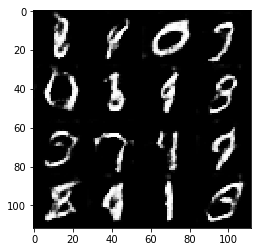

Epoch 1/2... Discriminator Loss: 0.5316... Generator Loss: 1.7626
Epoch 1/2... Discriminator Loss: 0.5724... Generator Loss: 1.9296
Epoch 1/2... Discriminator Loss: 0.7071... Generator Loss: 0.9765
Epoch 1/2... Discriminator Loss: 0.6870... Generator Loss: 1.0245
Epoch 1/2... Discriminator Loss: 0.9876... Generator Loss: 0.7128


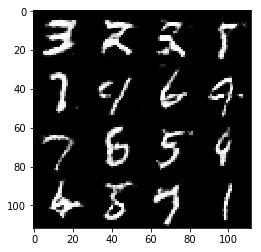

Epoch 1/2... Discriminator Loss: 1.8982... Generator Loss: 0.2260
Epoch 1/2... Discriminator Loss: 1.1016... Generator Loss: 2.8136
Epoch 1/2... Discriminator Loss: 0.8609... Generator Loss: 0.7868
Epoch 1/2... Discriminator Loss: 1.3146... Generator Loss: 0.4686
Epoch 1/2... Discriminator Loss: 0.6432... Generator Loss: 1.7581


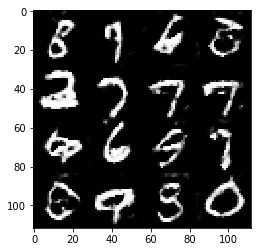

Epoch 1/2... Discriminator Loss: 0.7807... Generator Loss: 1.1256
Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 1.4493
Epoch 1/2... Discriminator Loss: 0.7909... Generator Loss: 1.7371
Epoch 1/2... Discriminator Loss: 0.8488... Generator Loss: 0.7970
Epoch 1/2... Discriminator Loss: 0.5166... Generator Loss: 1.5551


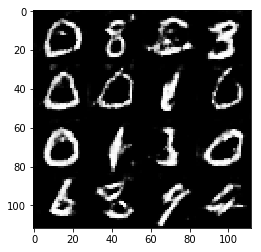

Epoch 1/2... Discriminator Loss: 1.4278... Generator Loss: 0.6482
Epoch 1/2... Discriminator Loss: 1.3875... Generator Loss: 2.8564
Epoch 1/2... Discriminator Loss: 1.5238... Generator Loss: 0.4159
Epoch 1/2... Discriminator Loss: 1.2200... Generator Loss: 0.6079
Epoch 1/2... Discriminator Loss: 1.1199... Generator Loss: 0.7322


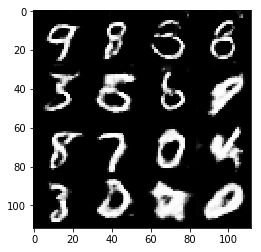

Epoch 1/2... Discriminator Loss: 0.8801... Generator Loss: 1.9305
Epoch 1/2... Discriminator Loss: 0.5261... Generator Loss: 1.6655
Epoch 1/2... Discriminator Loss: 0.8192... Generator Loss: 1.1628


In [21]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.9390... Generator Loss: 10.1817
Epoch 0/1... Discriminator Loss: 0.7674... Generator Loss: 13.3339
Epoch 0/1... Discriminator Loss: 3.1019... Generator Loss: 0.0498
Epoch 0/1... Discriminator Loss: 2.4411... Generator Loss: 0.0949


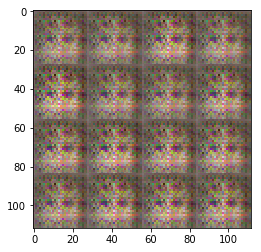

Epoch 0/1... Discriminator Loss: 0.6168... Generator Loss: 10.3101
Epoch 0/1... Discriminator Loss: 0.5619... Generator Loss: 12.6544
Epoch 0/1... Discriminator Loss: 0.2627... Generator Loss: 3.0253
Epoch 0/1... Discriminator Loss: 0.9215... Generator Loss: 0.7299
Epoch 0/1... Discriminator Loss: 0.9502... Generator Loss: 0.8267


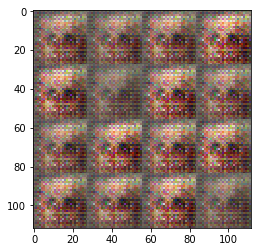

Epoch 0/1... Discriminator Loss: 0.2813... Generator Loss: 1.9670
Epoch 0/1... Discriminator Loss: 0.3406... Generator Loss: 3.0703
Epoch 0/1... Discriminator Loss: 0.4400... Generator Loss: 1.2794
Epoch 0/1... Discriminator Loss: 0.7114... Generator Loss: 5.8787
Epoch 0/1... Discriminator Loss: 0.5387... Generator Loss: 1.1118


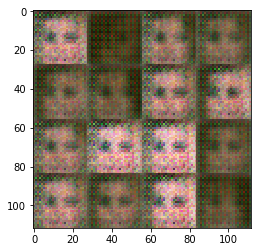

Epoch 0/1... Discriminator Loss: 1.0229... Generator Loss: 0.6965
Epoch 0/1... Discriminator Loss: 0.4207... Generator Loss: 3.4804
Epoch 0/1... Discriminator Loss: 1.2787... Generator Loss: 0.4483
Epoch 0/1... Discriminator Loss: 1.0219... Generator Loss: 0.7202
Epoch 0/1... Discriminator Loss: 0.9430... Generator Loss: 0.7444


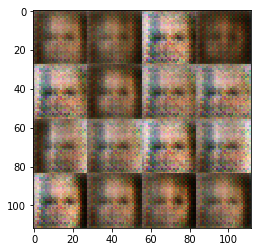

Epoch 0/1... Discriminator Loss: 1.3658... Generator Loss: 5.3077
Epoch 0/1... Discriminator Loss: 0.9712... Generator Loss: 3.4209
Epoch 0/1... Discriminator Loss: 0.7246... Generator Loss: 4.4291
Epoch 0/1... Discriminator Loss: 1.4691... Generator Loss: 3.1912
Epoch 0/1... Discriminator Loss: 1.4769... Generator Loss: 0.4489


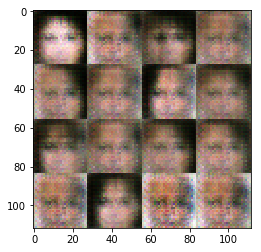

Epoch 0/1... Discriminator Loss: 1.1512... Generator Loss: 1.1375
Epoch 0/1... Discriminator Loss: 0.9719... Generator Loss: 2.2480
Epoch 0/1... Discriminator Loss: 0.7933... Generator Loss: 1.2709
Epoch 0/1... Discriminator Loss: 0.9982... Generator Loss: 1.0763
Epoch 0/1... Discriminator Loss: 1.5182... Generator Loss: 0.7377


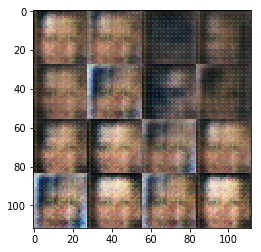

Epoch 0/1... Discriminator Loss: 1.0371... Generator Loss: 0.9447
Epoch 0/1... Discriminator Loss: 1.3887... Generator Loss: 2.3935
Epoch 0/1... Discriminator Loss: 0.9781... Generator Loss: 1.3720
Epoch 0/1... Discriminator Loss: 0.7906... Generator Loss: 1.4612
Epoch 0/1... Discriminator Loss: 0.8804... Generator Loss: 1.9834


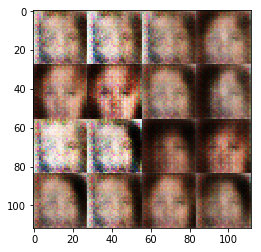

Epoch 0/1... Discriminator Loss: 1.5461... Generator Loss: 0.4492
Epoch 0/1... Discriminator Loss: 1.0253... Generator Loss: 0.8289
Epoch 0/1... Discriminator Loss: 0.8717... Generator Loss: 1.4087
Epoch 0/1... Discriminator Loss: 0.9792... Generator Loss: 1.2252
Epoch 0/1... Discriminator Loss: 0.9545... Generator Loss: 0.8610


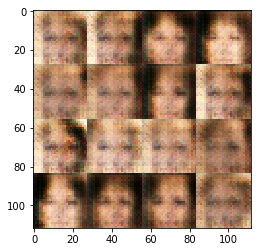

Epoch 0/1... Discriminator Loss: 1.1905... Generator Loss: 0.5823
Epoch 0/1... Discriminator Loss: 0.7332... Generator Loss: 1.6031
Epoch 0/1... Discriminator Loss: 1.4059... Generator Loss: 0.6762
Epoch 0/1... Discriminator Loss: 1.9479... Generator Loss: 4.3174
Epoch 0/1... Discriminator Loss: 0.6106... Generator Loss: 1.3611


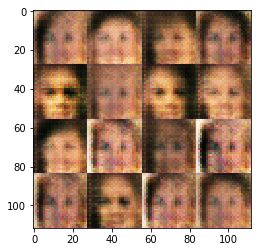

Epoch 0/1... Discriminator Loss: 0.6633... Generator Loss: 1.6961
Epoch 0/1... Discriminator Loss: 0.7262... Generator Loss: 1.2982
Epoch 0/1... Discriminator Loss: 1.3376... Generator Loss: 0.7807
Epoch 0/1... Discriminator Loss: 1.1191... Generator Loss: 0.7972
Epoch 0/1... Discriminator Loss: 0.6450... Generator Loss: 1.6071


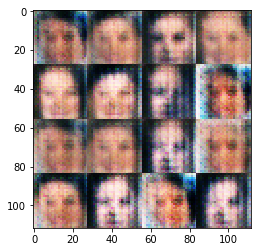

Epoch 0/1... Discriminator Loss: 1.7141... Generator Loss: 0.2764
Epoch 0/1... Discriminator Loss: 0.7734... Generator Loss: 1.8362
Epoch 0/1... Discriminator Loss: 0.8034... Generator Loss: 1.0811
Epoch 0/1... Discriminator Loss: 0.7326... Generator Loss: 1.6841
Epoch 0/1... Discriminator Loss: 0.8400... Generator Loss: 1.2485


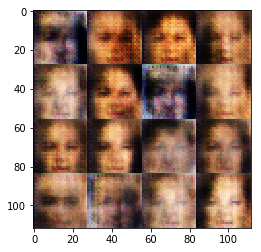

Epoch 0/1... Discriminator Loss: 0.7920... Generator Loss: 1.0022
Epoch 0/1... Discriminator Loss: 1.5350... Generator Loss: 2.0401
Epoch 0/1... Discriminator Loss: 0.9230... Generator Loss: 2.5049
Epoch 0/1... Discriminator Loss: 1.1830... Generator Loss: 0.6376
Epoch 0/1... Discriminator Loss: 0.9299... Generator Loss: 0.7837


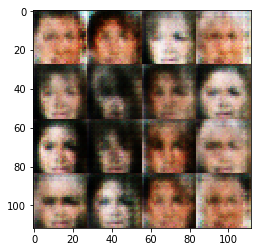

Epoch 0/1... Discriminator Loss: 0.9139... Generator Loss: 1.4771
Epoch 0/1... Discriminator Loss: 1.0823... Generator Loss: 1.0248
Epoch 0/1... Discriminator Loss: 1.0259... Generator Loss: 1.3749
Epoch 0/1... Discriminator Loss: 0.9694... Generator Loss: 1.1067
Epoch 0/1... Discriminator Loss: 0.9097... Generator Loss: 1.2372


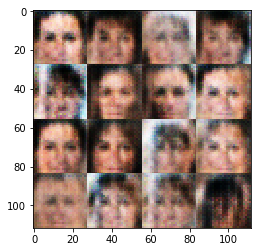

Epoch 0/1... Discriminator Loss: 0.9482... Generator Loss: 1.2177
Epoch 0/1... Discriminator Loss: 0.8649... Generator Loss: 1.3381
Epoch 0/1... Discriminator Loss: 0.6100... Generator Loss: 1.4032
Epoch 0/1... Discriminator Loss: 1.1598... Generator Loss: 0.9289
Epoch 0/1... Discriminator Loss: 1.0785... Generator Loss: 0.6667


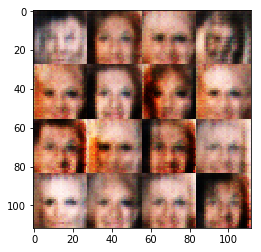

Epoch 0/1... Discriminator Loss: 0.6632... Generator Loss: 1.6381
Epoch 0/1... Discriminator Loss: 0.7299... Generator Loss: 1.3767
Epoch 0/1... Discriminator Loss: 1.0600... Generator Loss: 0.8633
Epoch 0/1... Discriminator Loss: 1.0377... Generator Loss: 0.7625
Epoch 0/1... Discriminator Loss: 1.1184... Generator Loss: 1.4138


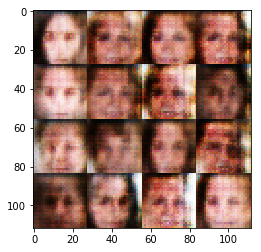

Epoch 0/1... Discriminator Loss: 1.1832... Generator Loss: 0.8507
Epoch 0/1... Discriminator Loss: 0.8415... Generator Loss: 1.0282
Epoch 0/1... Discriminator Loss: 1.0625... Generator Loss: 1.0053
Epoch 0/1... Discriminator Loss: 0.9184... Generator Loss: 1.0179
Epoch 0/1... Discriminator Loss: 1.0674... Generator Loss: 1.0376


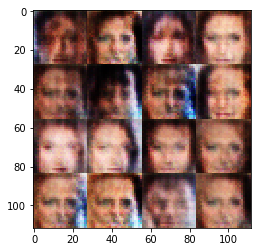

Epoch 0/1... Discriminator Loss: 1.0308... Generator Loss: 1.6711
Epoch 0/1... Discriminator Loss: 0.9790... Generator Loss: 0.8469
Epoch 0/1... Discriminator Loss: 1.0040... Generator Loss: 0.8027
Epoch 0/1... Discriminator Loss: 1.1871... Generator Loss: 0.7508
Epoch 0/1... Discriminator Loss: 1.0225... Generator Loss: 1.1282


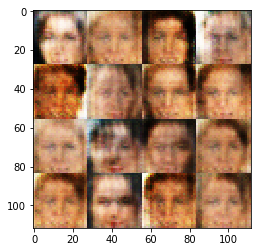

Epoch 0/1... Discriminator Loss: 1.4810... Generator Loss: 0.6611
Epoch 0/1... Discriminator Loss: 1.1869... Generator Loss: 1.1874
Epoch 0/1... Discriminator Loss: 0.9608... Generator Loss: 0.8336
Epoch 0/1... Discriminator Loss: 0.8638... Generator Loss: 1.1797
Epoch 0/1... Discriminator Loss: 0.8827... Generator Loss: 0.9671


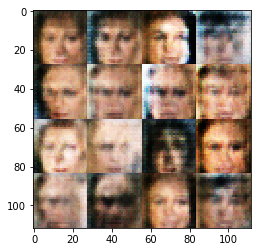

Epoch 0/1... Discriminator Loss: 1.0930... Generator Loss: 0.7303
Epoch 0/1... Discriminator Loss: 1.0358... Generator Loss: 1.2142
Epoch 0/1... Discriminator Loss: 1.1028... Generator Loss: 1.1105
Epoch 0/1... Discriminator Loss: 0.4931... Generator Loss: 1.5871
Epoch 0/1... Discriminator Loss: 1.5010... Generator Loss: 0.5052


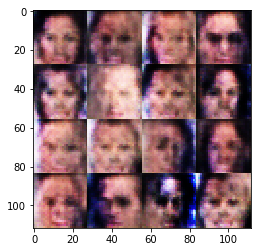

Epoch 0/1... Discriminator Loss: 1.1371... Generator Loss: 1.2415
Epoch 0/1... Discriminator Loss: 0.9324... Generator Loss: 0.8664
Epoch 0/1... Discriminator Loss: 1.3587... Generator Loss: 0.4468
Epoch 0/1... Discriminator Loss: 1.4154... Generator Loss: 0.5588
Epoch 0/1... Discriminator Loss: 1.1390... Generator Loss: 1.3321


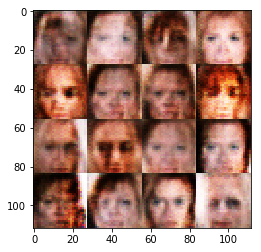

Epoch 0/1... Discriminator Loss: 0.9317... Generator Loss: 1.0647
Epoch 0/1... Discriminator Loss: 0.7707... Generator Loss: 1.1965
Epoch 0/1... Discriminator Loss: 1.0728... Generator Loss: 1.1538
Epoch 0/1... Discriminator Loss: 1.0874... Generator Loss: 1.2021
Epoch 0/1... Discriminator Loss: 0.7861... Generator Loss: 1.0407


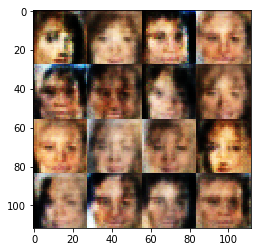

Epoch 0/1... Discriminator Loss: 0.8865... Generator Loss: 0.9572
Epoch 0/1... Discriminator Loss: 1.0624... Generator Loss: 0.7529
Epoch 0/1... Discriminator Loss: 0.7001... Generator Loss: 1.5760
Epoch 0/1... Discriminator Loss: 1.8310... Generator Loss: 0.2780
Epoch 0/1... Discriminator Loss: 1.0238... Generator Loss: 1.2643


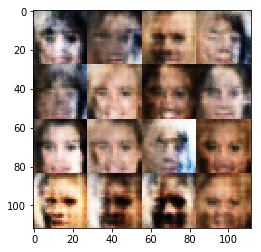

Epoch 0/1... Discriminator Loss: 0.9694... Generator Loss: 0.8222
Epoch 0/1... Discriminator Loss: 1.0524... Generator Loss: 0.9937
Epoch 0/1... Discriminator Loss: 0.8829... Generator Loss: 1.3122
Epoch 0/1... Discriminator Loss: 1.0007... Generator Loss: 0.9366
Epoch 0/1... Discriminator Loss: 0.9582... Generator Loss: 1.0831


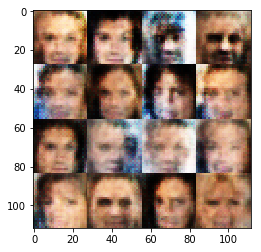

Epoch 0/1... Discriminator Loss: 1.1944... Generator Loss: 2.2265
Epoch 0/1... Discriminator Loss: 1.0204... Generator Loss: 1.0919
Epoch 0/1... Discriminator Loss: 0.9422... Generator Loss: 0.8507
Epoch 0/1... Discriminator Loss: 0.9090... Generator Loss: 1.3402
Epoch 0/1... Discriminator Loss: 1.8924... Generator Loss: 0.2586


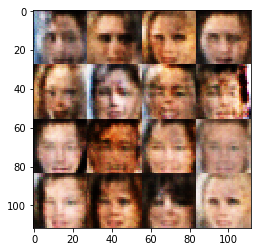

Epoch 0/1... Discriminator Loss: 0.8512... Generator Loss: 1.2933
Epoch 0/1... Discriminator Loss: 1.2695... Generator Loss: 1.0026
Epoch 0/1... Discriminator Loss: 1.2773... Generator Loss: 0.5689
Epoch 0/1... Discriminator Loss: 1.1984... Generator Loss: 0.6650
Epoch 0/1... Discriminator Loss: 1.1693... Generator Loss: 0.7772


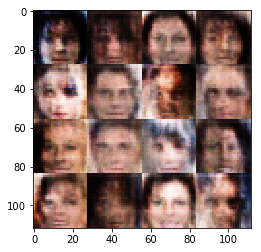

Epoch 0/1... Discriminator Loss: 1.1967... Generator Loss: 1.4279
Epoch 0/1... Discriminator Loss: 0.9945... Generator Loss: 0.8860
Epoch 0/1... Discriminator Loss: 1.0911... Generator Loss: 1.2675
Epoch 0/1... Discriminator Loss: 1.2018... Generator Loss: 0.5498
Epoch 0/1... Discriminator Loss: 0.8054... Generator Loss: 1.8708


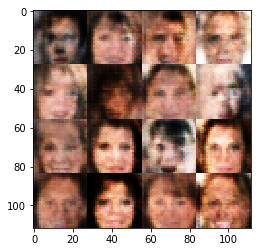

Epoch 0/1... Discriminator Loss: 0.7615... Generator Loss: 1.5740
Epoch 0/1... Discriminator Loss: 1.1300... Generator Loss: 0.8794
Epoch 0/1... Discriminator Loss: 1.1554... Generator Loss: 0.6810
Epoch 0/1... Discriminator Loss: 0.9355... Generator Loss: 1.3847
Epoch 0/1... Discriminator Loss: 1.0956... Generator Loss: 1.5043


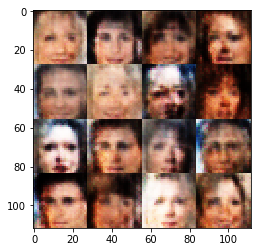

Epoch 0/1... Discriminator Loss: 0.7520... Generator Loss: 1.3505
Epoch 0/1... Discriminator Loss: 0.9548... Generator Loss: 1.0135
Epoch 0/1... Discriminator Loss: 1.1707... Generator Loss: 1.6520
Epoch 0/1... Discriminator Loss: 1.2739... Generator Loss: 0.4848
Epoch 0/1... Discriminator Loss: 1.0565... Generator Loss: 1.6928


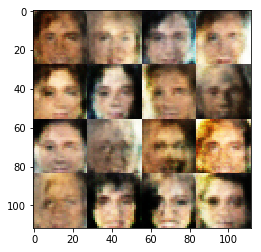

Epoch 0/1... Discriminator Loss: 0.9547... Generator Loss: 1.6261
Epoch 0/1... Discriminator Loss: 1.2474... Generator Loss: 0.6187
Epoch 0/1... Discriminator Loss: 1.1257... Generator Loss: 1.2263
Epoch 0/1... Discriminator Loss: 1.2639... Generator Loss: 0.5752
Epoch 0/1... Discriminator Loss: 0.9567... Generator Loss: 1.2367


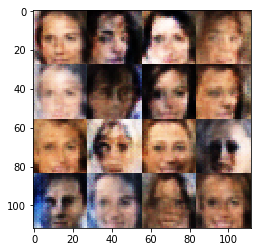

Epoch 0/1... Discriminator Loss: 0.9065... Generator Loss: 0.9766
Epoch 0/1... Discriminator Loss: 1.0521... Generator Loss: 2.2465
Epoch 0/1... Discriminator Loss: 1.1948... Generator Loss: 0.7410
Epoch 0/1... Discriminator Loss: 1.1634... Generator Loss: 0.5691
Epoch 0/1... Discriminator Loss: 1.3605... Generator Loss: 0.4550


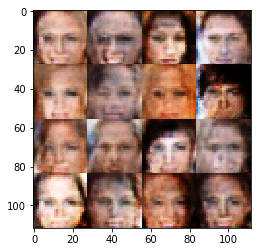

Epoch 0/1... Discriminator Loss: 1.0087... Generator Loss: 0.6733
Epoch 0/1... Discriminator Loss: 1.4181... Generator Loss: 0.4501
Epoch 0/1... Discriminator Loss: 1.1798... Generator Loss: 0.6995
Epoch 0/1... Discriminator Loss: 0.7366... Generator Loss: 1.4540
Epoch 0/1... Discriminator Loss: 0.9418... Generator Loss: 0.9382


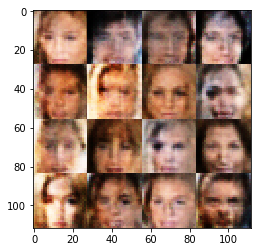

Epoch 0/1... Discriminator Loss: 1.2119... Generator Loss: 1.4656
Epoch 0/1... Discriminator Loss: 1.0774... Generator Loss: 1.0961
Epoch 0/1... Discriminator Loss: 1.1787... Generator Loss: 0.5978
Epoch 0/1... Discriminator Loss: 0.9993... Generator Loss: 1.8535
Epoch 0/1... Discriminator Loss: 1.1271... Generator Loss: 0.9837


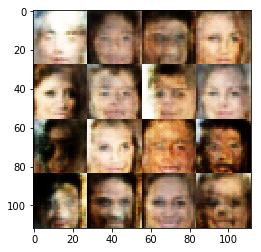

Epoch 0/1... Discriminator Loss: 0.9903... Generator Loss: 2.1126
Epoch 0/1... Discriminator Loss: 0.9343... Generator Loss: 1.4394
Epoch 0/1... Discriminator Loss: 1.2319... Generator Loss: 0.5054
Epoch 0/1... Discriminator Loss: 0.9105... Generator Loss: 0.9379
Epoch 0/1... Discriminator Loss: 1.2642... Generator Loss: 2.0840


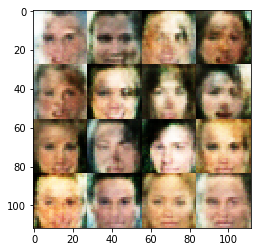

Epoch 0/1... Discriminator Loss: 1.2164... Generator Loss: 1.2220
Epoch 0/1... Discriminator Loss: 1.1179... Generator Loss: 0.9982
Epoch 0/1... Discriminator Loss: 0.8940... Generator Loss: 1.1906
Epoch 0/1... Discriminator Loss: 0.9990... Generator Loss: 0.7267
Epoch 0/1... Discriminator Loss: 1.1664... Generator Loss: 0.9817


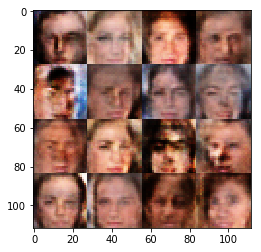

Epoch 0/1... Discriminator Loss: 0.8014... Generator Loss: 1.3171
Epoch 0/1... Discriminator Loss: 1.2189... Generator Loss: 0.5383
Epoch 0/1... Discriminator Loss: 1.1155... Generator Loss: 0.7297
Epoch 0/1... Discriminator Loss: 1.1340... Generator Loss: 1.2073
Epoch 0/1... Discriminator Loss: 1.1251... Generator Loss: 1.8699


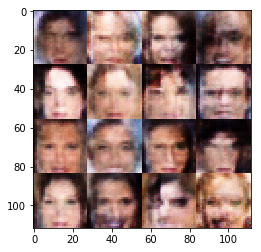

Epoch 0/1... Discriminator Loss: 1.0114... Generator Loss: 1.5367
Epoch 0/1... Discriminator Loss: 0.9584... Generator Loss: 1.2989
Epoch 0/1... Discriminator Loss: 0.8105... Generator Loss: 1.4932
Epoch 0/1... Discriminator Loss: 1.3206... Generator Loss: 0.4811
Epoch 0/1... Discriminator Loss: 1.0672... Generator Loss: 0.6798


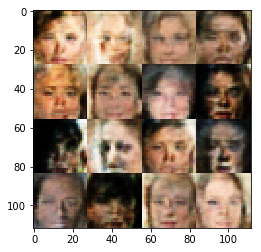

Epoch 0/1... Discriminator Loss: 1.0823... Generator Loss: 0.7776
Epoch 0/1... Discriminator Loss: 1.1081... Generator Loss: 1.2655
Epoch 0/1... Discriminator Loss: 0.8668... Generator Loss: 1.5830
Epoch 0/1... Discriminator Loss: 1.1262... Generator Loss: 0.6977
Epoch 0/1... Discriminator Loss: 0.9679... Generator Loss: 1.0413


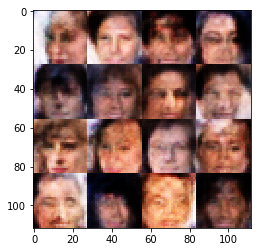

Epoch 0/1... Discriminator Loss: 1.0640... Generator Loss: 1.4398
Epoch 0/1... Discriminator Loss: 1.0069... Generator Loss: 1.2979
Epoch 0/1... Discriminator Loss: 1.1797... Generator Loss: 0.7951
Epoch 0/1... Discriminator Loss: 1.1832... Generator Loss: 0.7811
Epoch 0/1... Discriminator Loss: 0.9305... Generator Loss: 1.2413


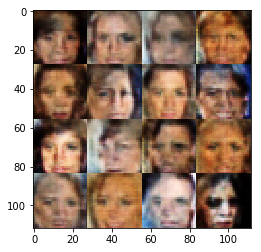

Epoch 0/1... Discriminator Loss: 1.0915... Generator Loss: 1.3743
Epoch 0/1... Discriminator Loss: 1.0898... Generator Loss: 0.6576
Epoch 0/1... Discriminator Loss: 1.7606... Generator Loss: 0.2544
Epoch 0/1... Discriminator Loss: 1.3148... Generator Loss: 0.4818
Epoch 0/1... Discriminator Loss: 1.1438... Generator Loss: 0.9388


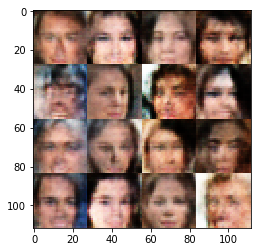

Epoch 0/1... Discriminator Loss: 1.2334... Generator Loss: 0.8367
Epoch 0/1... Discriminator Loss: 0.8722... Generator Loss: 1.2093
Epoch 0/1... Discriminator Loss: 1.3862... Generator Loss: 0.4193
Epoch 0/1... Discriminator Loss: 0.9007... Generator Loss: 0.9456
Epoch 0/1... Discriminator Loss: 1.0127... Generator Loss: 0.7622


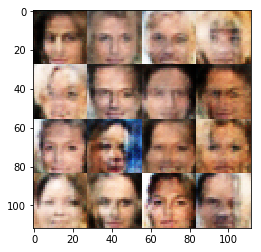

Epoch 0/1... Discriminator Loss: 1.0465... Generator Loss: 2.1160
Epoch 0/1... Discriminator Loss: 0.9639... Generator Loss: 0.7698
Epoch 0/1... Discriminator Loss: 1.1323... Generator Loss: 0.7125
Epoch 0/1... Discriminator Loss: 1.2310... Generator Loss: 0.4932
Epoch 0/1... Discriminator Loss: 1.0565... Generator Loss: 0.6841


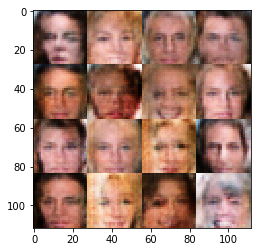

Epoch 0/1... Discriminator Loss: 0.8612... Generator Loss: 1.5404
Epoch 0/1... Discriminator Loss: 1.0898... Generator Loss: 1.5719
Epoch 0/1... Discriminator Loss: 1.3585... Generator Loss: 0.4475
Epoch 0/1... Discriminator Loss: 1.2489... Generator Loss: 0.7734
Epoch 0/1... Discriminator Loss: 1.3210... Generator Loss: 1.7726


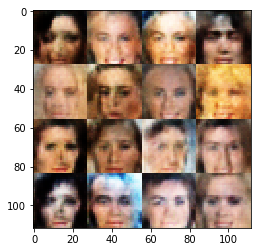

Epoch 0/1... Discriminator Loss: 1.3347... Generator Loss: 1.3655
Epoch 0/1... Discriminator Loss: 1.1397... Generator Loss: 1.3651
Epoch 0/1... Discriminator Loss: 0.9044... Generator Loss: 1.1678
Epoch 0/1... Discriminator Loss: 0.8358... Generator Loss: 1.4332
Epoch 0/1... Discriminator Loss: 1.2298... Generator Loss: 0.5198


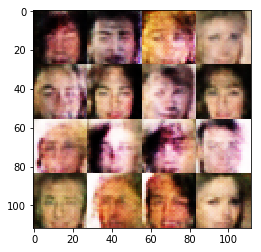

Epoch 0/1... Discriminator Loss: 0.8998... Generator Loss: 1.0187
Epoch 0/1... Discriminator Loss: 1.3678... Generator Loss: 0.8669
Epoch 0/1... Discriminator Loss: 0.9758... Generator Loss: 0.7430
Epoch 0/1... Discriminator Loss: 1.5396... Generator Loss: 0.3251
Epoch 0/1... Discriminator Loss: 1.0536... Generator Loss: 0.7858


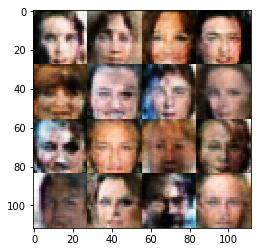

Epoch 0/1... Discriminator Loss: 1.0136... Generator Loss: 1.3083
Epoch 0/1... Discriminator Loss: 1.3233... Generator Loss: 0.5229
Epoch 0/1... Discriminator Loss: 0.9659... Generator Loss: 0.9943
Epoch 0/1... Discriminator Loss: 1.2101... Generator Loss: 0.9043
Epoch 0/1... Discriminator Loss: 0.8674... Generator Loss: 1.1028


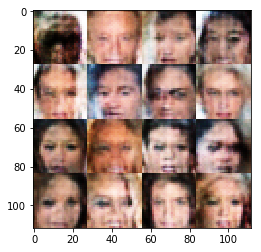

Epoch 0/1... Discriminator Loss: 0.8583... Generator Loss: 1.0875
Epoch 0/1... Discriminator Loss: 1.2437... Generator Loss: 0.6520
Epoch 0/1... Discriminator Loss: 1.4252... Generator Loss: 0.4349
Epoch 0/1... Discriminator Loss: 1.1814... Generator Loss: 0.9447
Epoch 0/1... Discriminator Loss: 0.8630... Generator Loss: 1.1376


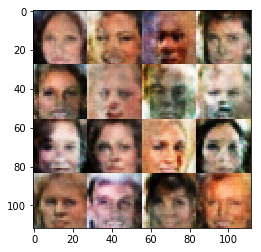

Epoch 0/1... Discriminator Loss: 1.1050... Generator Loss: 1.5299
Epoch 0/1... Discriminator Loss: 1.0697... Generator Loss: 0.9067
Epoch 0/1... Discriminator Loss: 0.9637... Generator Loss: 1.1240
Epoch 0/1... Discriminator Loss: 1.5174... Generator Loss: 0.3604
Epoch 0/1... Discriminator Loss: 1.0867... Generator Loss: 0.7417


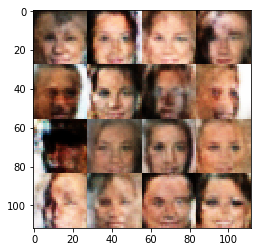

Epoch 0/1... Discriminator Loss: 1.0059... Generator Loss: 1.1575
Epoch 0/1... Discriminator Loss: 0.8171... Generator Loss: 1.1463
Epoch 0/1... Discriminator Loss: 1.2159... Generator Loss: 0.6526
Epoch 0/1... Discriminator Loss: 1.1777... Generator Loss: 1.8338
Epoch 0/1... Discriminator Loss: 1.0535... Generator Loss: 0.9272


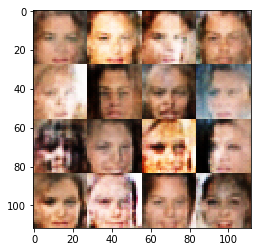

Epoch 0/1... Discriminator Loss: 1.2905... Generator Loss: 0.5213
Epoch 0/1... Discriminator Loss: 1.0654... Generator Loss: 0.8332
Epoch 0/1... Discriminator Loss: 1.1970... Generator Loss: 0.8843
Epoch 0/1... Discriminator Loss: 1.3575... Generator Loss: 1.3452
Epoch 0/1... Discriminator Loss: 1.4791... Generator Loss: 0.4255


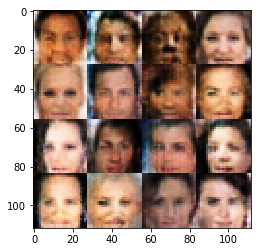

Epoch 0/1... Discriminator Loss: 0.9604... Generator Loss: 1.8284
Epoch 0/1... Discriminator Loss: 1.1167... Generator Loss: 0.9160
Epoch 0/1... Discriminator Loss: 1.1583... Generator Loss: 0.6681
Epoch 0/1... Discriminator Loss: 1.0198... Generator Loss: 0.7317
Epoch 0/1... Discriminator Loss: 1.0602... Generator Loss: 0.9853


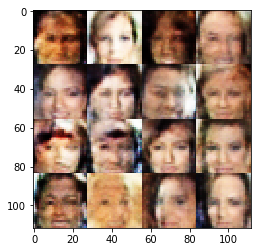

Epoch 0/1... Discriminator Loss: 1.1822... Generator Loss: 0.6348
Epoch 0/1... Discriminator Loss: 0.8264... Generator Loss: 1.4743
Epoch 0/1... Discriminator Loss: 1.1006... Generator Loss: 0.7839
Epoch 0/1... Discriminator Loss: 1.0114... Generator Loss: 0.8755
Epoch 0/1... Discriminator Loss: 0.6646... Generator Loss: 1.4156


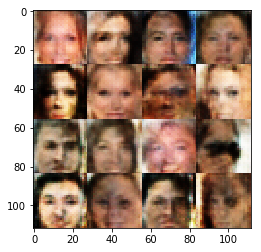

Epoch 0/1... Discriminator Loss: 1.4317... Generator Loss: 0.3840
Epoch 0/1... Discriminator Loss: 0.8042... Generator Loss: 0.9937
Epoch 0/1... Discriminator Loss: 1.2032... Generator Loss: 1.1596
Epoch 0/1... Discriminator Loss: 1.1784... Generator Loss: 0.5409
Epoch 0/1... Discriminator Loss: 1.0937... Generator Loss: 0.7689


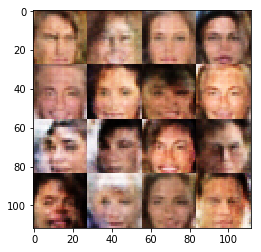

Epoch 0/1... Discriminator Loss: 0.9820... Generator Loss: 0.8731
Epoch 0/1... Discriminator Loss: 1.0059... Generator Loss: 1.2470
Epoch 0/1... Discriminator Loss: 0.9814... Generator Loss: 1.0056
Epoch 0/1... Discriminator Loss: 0.7989... Generator Loss: 1.1394
Epoch 0/1... Discriminator Loss: 0.8726... Generator Loss: 1.2641


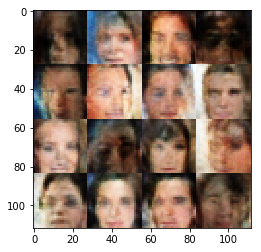

Epoch 0/1... Discriminator Loss: 1.1431... Generator Loss: 1.3963
Epoch 0/1... Discriminator Loss: 1.2466... Generator Loss: 0.4796
Epoch 0/1... Discriminator Loss: 1.2640... Generator Loss: 1.9162
Epoch 0/1... Discriminator Loss: 1.1544... Generator Loss: 0.5994
Epoch 0/1... Discriminator Loss: 0.8677... Generator Loss: 1.0410


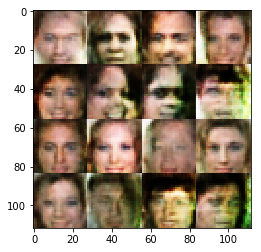

Epoch 0/1... Discriminator Loss: 0.6944... Generator Loss: 1.2204
Epoch 0/1... Discriminator Loss: 0.8977... Generator Loss: 0.8274
Epoch 0/1... Discriminator Loss: 1.0869... Generator Loss: 0.6037
Epoch 0/1... Discriminator Loss: 1.1874... Generator Loss: 0.6674
Epoch 0/1... Discriminator Loss: 1.2878... Generator Loss: 0.9846


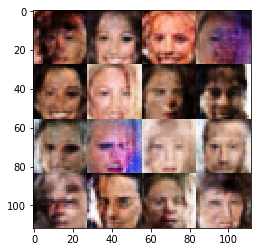

Epoch 0/1... Discriminator Loss: 1.0988... Generator Loss: 0.5996
Epoch 0/1... Discriminator Loss: 1.0388... Generator Loss: 0.9362
Epoch 0/1... Discriminator Loss: 0.7828... Generator Loss: 1.3046
Epoch 0/1... Discriminator Loss: 1.4141... Generator Loss: 0.4082
Epoch 0/1... Discriminator Loss: 0.9976... Generator Loss: 0.6955


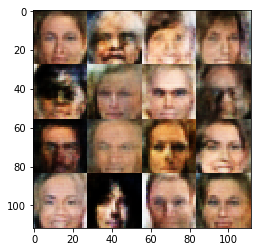

Epoch 0/1... Discriminator Loss: 0.9263... Generator Loss: 0.9356
Epoch 0/1... Discriminator Loss: 1.2637... Generator Loss: 0.5912
Epoch 0/1... Discriminator Loss: 1.0914... Generator Loss: 1.0572
Epoch 0/1... Discriminator Loss: 1.2902... Generator Loss: 0.4463
Epoch 0/1... Discriminator Loss: 0.9245... Generator Loss: 1.5074


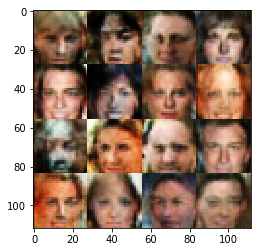

Epoch 0/1... Discriminator Loss: 0.8683... Generator Loss: 1.7930
Epoch 0/1... Discriminator Loss: 0.9356... Generator Loss: 1.1058
Epoch 0/1... Discriminator Loss: 0.7148... Generator Loss: 1.2887
Epoch 0/1... Discriminator Loss: 0.8280... Generator Loss: 1.3506
Epoch 0/1... Discriminator Loss: 1.0976... Generator Loss: 0.6990


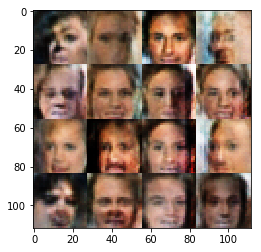

Epoch 0/1... Discriminator Loss: 0.9650... Generator Loss: 1.1778
Epoch 0/1... Discriminator Loss: 1.2611... Generator Loss: 1.7311
Epoch 0/1... Discriminator Loss: 1.1250... Generator Loss: 1.5537
Epoch 0/1... Discriminator Loss: 1.0683... Generator Loss: 1.0492
Epoch 0/1... Discriminator Loss: 1.0213... Generator Loss: 0.7897


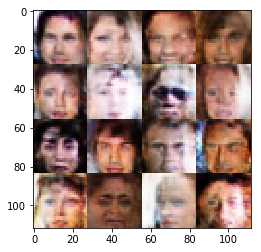

Epoch 0/1... Discriminator Loss: 1.2325... Generator Loss: 0.5607
Epoch 0/1... Discriminator Loss: 0.8892... Generator Loss: 2.4540
Epoch 0/1... Discriminator Loss: 1.0085... Generator Loss: 1.4256
Epoch 0/1... Discriminator Loss: 0.6482... Generator Loss: 1.4811
Epoch 0/1... Discriminator Loss: 1.5130... Generator Loss: 0.4315


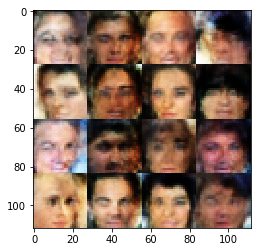

Epoch 0/1... Discriminator Loss: 1.1041... Generator Loss: 0.6506
Epoch 0/1... Discriminator Loss: 1.2218... Generator Loss: 0.6289
Epoch 0/1... Discriminator Loss: 0.9488... Generator Loss: 1.0177
Epoch 0/1... Discriminator Loss: 0.9997... Generator Loss: 1.4569
Epoch 0/1... Discriminator Loss: 1.1652... Generator Loss: 0.5757


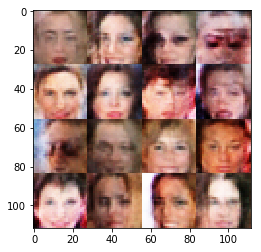

Epoch 0/1... Discriminator Loss: 0.9999... Generator Loss: 1.5753
Epoch 0/1... Discriminator Loss: 1.2837... Generator Loss: 0.4508
Epoch 0/1... Discriminator Loss: 0.9798... Generator Loss: 1.4147
Epoch 0/1... Discriminator Loss: 1.0695... Generator Loss: 0.6943
Epoch 0/1... Discriminator Loss: 1.4374... Generator Loss: 1.5188


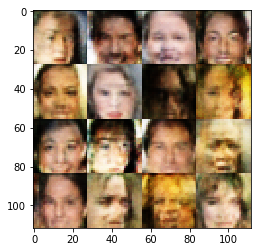

Epoch 0/1... Discriminator Loss: 0.9632... Generator Loss: 0.8479
Epoch 0/1... Discriminator Loss: 1.0058... Generator Loss: 1.0537
Epoch 0/1... Discriminator Loss: 1.3940... Generator Loss: 0.5159
Epoch 0/1... Discriminator Loss: 1.1859... Generator Loss: 0.6756
Epoch 0/1... Discriminator Loss: 0.8723... Generator Loss: 1.3463


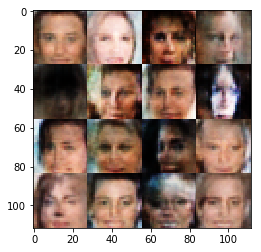

Epoch 0/1... Discriminator Loss: 1.0369... Generator Loss: 0.8182
Epoch 0/1... Discriminator Loss: 1.3528... Generator Loss: 0.5228


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.